# GLI3

The [GLI3](https://www.omim.org/entry/165240) gene encodes a zinc finger transcription factor involved in the cilia-associated Hedgehog signalling pathway that regulates an abundance of processes in vertebrate and invertebrate biology, broadly falling into the categories of embryonic development, tissue regeneration and tumorigenesis. 

GLI3 is mainly regulated at the post-translational level. In the absence of Hedgehog-ligands it is either bound by SUFU and arrested in the cytoplasm or phosphorylated and truncated up until its N-terminal repressor domain, therefore inhibiting transcription of GLI-dependent genes. While a global knockout of SUFU leads to prenatal mortality around midgestation in mice, a conditional knockout in mesenchymal cell populations leads to polydactyly. Under Hedgehog signalling full length GLI3 can translocate into the nucleus and act as a transcriptional activator ([Yoshida S, Yoshida K. Anat Sci Int. 2024](https://pubmed.ncbi.nlm.nih.gov/39576500/)).


[Sczakiel HL, et al. (Clin Genet. 2021)](https://pubmed.ncbi.nlm.nih.gov/34482537/) distinguish three allelic, autosomally-dominant inherited disorders caused by heterozygous variants in GLI3. OMIM additionally distinguishes two subforms of non-syndromic (isolated) polysyndactyly:
1. [Greig cephalopolysyndactyly syndrome (GCPS)](https://www.omim.org/clinicalSynopsis/175700): characterized by scaphocephaly, frontal bossing, abnormalities of the corpus callosum, hypertelorism, polydactyly (pre- and postaxial) and syndactyly (central). Affected individuals usually show normal intelligence or rarely mild intellectual disability.
2. [Pallister-Hall syndrome (PHS)](https://www.omim.org/clinicalSynopsis/146510): characterized by hypothalamic hamartoma, pituitary dysfunction, polydactyly and visceral malformations. Affected individual usually show normal intelligence or rarely mild intellectual disability.
3. Isolated polysyndactyly (IPD):
   a. [Postaxial polydactyly type A1 (PAPA1) and B (PAPB)](https://www.omim.org/clinicalSynopsis/174200): can affect hands as well as feet and also include  syndactylies.
   b. [Preaxial polydactyly type IV](https://www.omim.org/clinicalSynopsis/174700): can affect feet in isolation or both hands and feet and also invole      bilateral duplication or unilateral triplication of the 5th finger as well as syndactylies. 

Several previous publications have reported candidate genotype-phenotype correlations on the GLI3 gene.

1. [Johnston JJ, et al. (Am J Hum Genet. 2005)](https://pubmed.ncbi.nlm.nih.gov/15739154/) proposes a two-fold model wherein:
    a. PHS is only caused by frameshift and splicing mutations, while GCPS is caused by most other types of mutation.
    b. Frameshift mutations within nt1–1997/AA1-660 and downstream (C-terminal) of nt3481/AA1160-1580 also cause GCPS, only frameshift mutations between nt1998–3481/AA661-1159 cause PHS.
    [Jamsheer A, et al. (J Appl Genet. 2012)](https://pubmed.ncbi.nlm.nih.gov/22903559/), [Johnston JJ, et al. (Hum Mutat. 2010)](https://pubmed.ncbi.nlm.nih.gov/20672375/) and [Patel R, et al. (Am J Med Genet A. 2021)](https://pubmed.ncbi.nlm.nih.gov/33058447/) published cohorts, supporting this hypothesis.
    
   
2. [Démurger F, et al. (Eur J Hum Genet. 2015)](https://pubmed.ncbi.nlm.nih.gov/24736735/) propose that, in the context of GPCS, corpus callosum anomalies are caused by truncating mutations in the distal third of the protein.
3. Two reviews by [Biesecker LG, et al. (Nat Genet. 1997)](https://pubmed.ncbi.nlm.nih.gov/9354780/) and [Al-Qattan MM, et al. (Clin Genet. 2017)](https://pubmed.ncbi.nlm.nih.gov/28224613/) reviewing already published cohorts postulate, that IPD only arises from variants of the C-terminal third. [Sczakiel HL, et al. (Clin Genet. 2021)](https://pubmed.ncbi.nlm.nih.gov/34482537/) published variants in other regions of the protein in patients with clinical IPD and therefore propose the absence of a genotype-phenotype correlation.


Therefore we tested frameshift mutations within the medium third of the protein together with splicing mutations against all other mutations concerning the occurence of the clinical signs ofs PHS. 
We further tested if truncating mutations (as approximated by stop-gains and frameshifts in the last exon - most likely not leading to NMD) show a correlation with the occurence of anomalies of the corpus callosum (Abnormal corpus callosum morphology - HP:0001273).
And we tested if variants in the C-terminal third show higher occurence of IPD (PAPA1/PAPB in our cohort) when compared against all other variants.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.9.1


### GLI3
We used the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for GLI3.

In [2]:
gene_symbol = 'GLI3'
mane_tx_id = 'NM_000168.6'
mane_protein_id = 'NP_000159.3' # transcriptional activator GLI3 [Homo sapiens]

In [3]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Loaded 82 phenopackets
Individuals Processed: 100%|██████████| 82/82 [01:33<00:00,  1.14s/individuals]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
37,Preaxial foot polydactyly
36,Postaxial hand polydactyly
32,Syndactyly
28,Macrocephaly
19,Broad thumb
18,Hypertelorism
17,Postaxial polydactyly
15,Y-shaped metacarpals
15,Y-shaped metatarsals
13,Shortening of all distal phalanges of the fingers


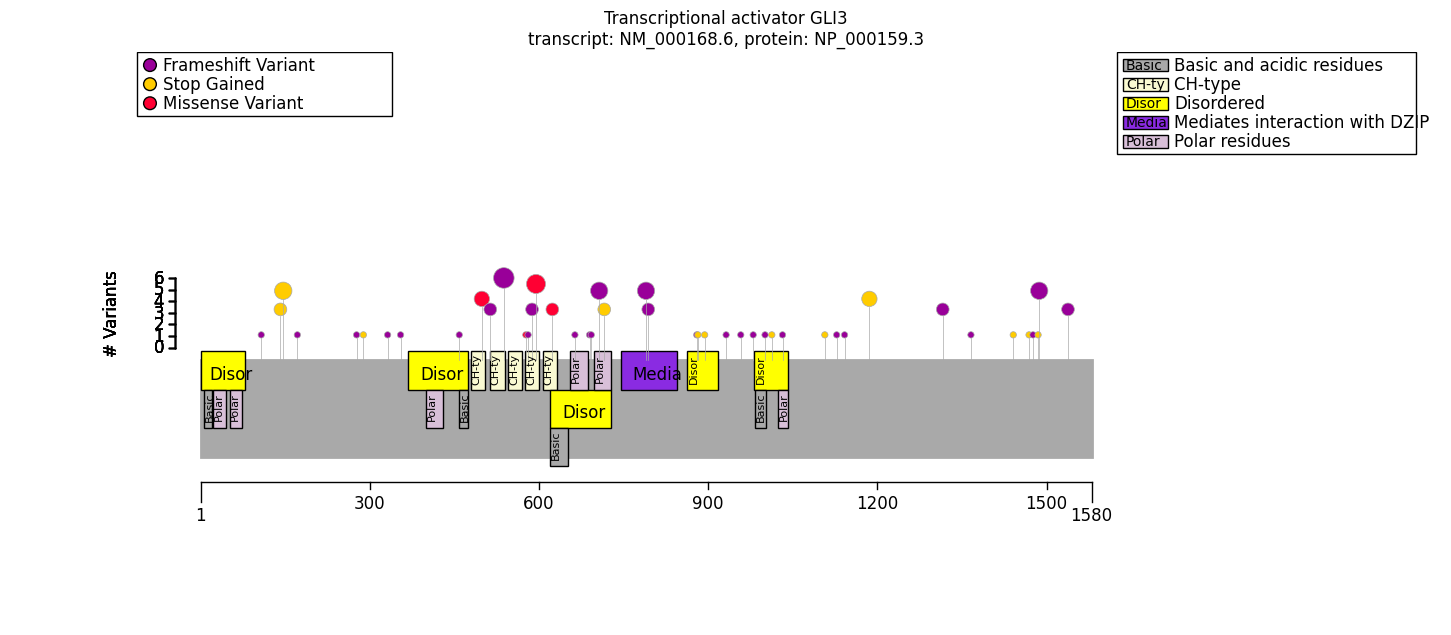

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)


gli3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
gli3_fig.tight_layout()

In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
6,7_41978628_41978630_GTC_G,c.1616_1617del (p.Arg539ThrfsTer12),11,frameshift
4,7_42076781_42076781_G_T,c.444C>A (p.Tyr148Ter),4,stop gained
4,7_41967654_41967655_CG_C,c.2372del (p.Pro791ArgfsTer3),14,frameshift
4,7_41967900_41967904_ACCAC_A,c.2123_2126del (p.Gly708ValfsTer24),14,frameshift
4,7_41964609_41964610_TG_T,c.4463del (p.Thr1488LysfsTer23),15,frameshift
3,7_41978748_41978748_G_A,c.1498C>T (p.His500Tyr),11,"missense, splice region"
3,7_41965514_41965514_G_A,c.3559C>T (p.Gln1187Ter),15,stop gained
3,SO:1000029_HGNC:4319_GLI3,SV involving GLI3 (p.?),,chromosomal deletion
3,7_41977584_41977584_G_A,c.1786C>T (p.His596Tyr),12,missense
2,7_41967641_41967642_TG_T,c.2385del (p.Ile796PhefsTer13),14,frameshift


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

### Hypothesis 1: 
Frameshift mutations within the medium third of the gene together with splicing mutations correlate with the occurence of PHS

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import protein_region, variant_effect, allof, anyof
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

is_frameshift = variant_effect(effect=VariantEffect.FRAMESHIFT_VARIANT, tx_id=mane_tx_id)
is_midregion = protein_region(region=(661,1159), tx_id=mane_tx_id)
is_fameshift_midregion = allof((is_frameshift, is_midregion))

is_splicevar = variant_effect(effect=VariantEffect.SPLICE_REGION_VARIANT, tx_id=mane_tx_id)


is_PHS_candidates = anyof ((is_fameshift_midregion, is_splicevar))
PHS_cand_label = "Fs in mid region or splice"

PHS_clf = monoallelic_classifier(
    a_predicate = is_PHS_candidates,
    b_predicate=~is_PHS_candidates,
    a_label = PHS_cand_label,
      b_label = "other",
)

PHS_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=PHS_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(PHS_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,14
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,43
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,88


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, PHS_result)

Allele group                                       Fs in mid region or splice  \
                                                                        Count   
Y-shaped metatarsals [HP:0010567]                                       11/19   
Y-shaped metacarpals [HP:0006042]                                       11/23   
Preaxial foot polydactyly [HP:0001841]                                   5/25   
Postaxial polydactyly [HP:0100259]                                      18/22   
Macrocephaly [HP:0000256]                                                 1/9   
Preaxial polydactyly [HP:0100258]                                         5/9   
Postaxial hand polydactyly [HP:0001162]                                  6/13   
Syndactyly [HP:0001159]                                                   3/5   
Polydactyly [HP:0010442]                                                21/21   
Abnormal digit morphology [HP:0011297]                                  24/24   
Abnormal appendicular skeleton morphology [HP:0...                      25/25   
Abnormal 5th finger morphology [HP:0004207]                               6/6   
Abnormal finger morphology [HP:0001167]                                 14/14   
Hand polydactyly [HP:0001161]                                             6/6   
Abnormal finger phalanx morphology [HP:0005918]                         14/14   
Abnormal hand morphology [HP:0005922]                                   21/21   
Abnormal hallux morphology [HP:0001844]                                   5/5   
Abnormal toe morphology [HP:0001780]                                      5/5   
Foot polydactyly [HP:0001829]                                             5/5   

Allele group                                                other          \
                                                   Percent  Count Percent   
Y-shaped metatarsals [HP:0010567]                      58%   4/50      8%   
Y-shaped metacarpals [HP:0006042]                      48%   4/56      7%   
Preaxial foot polydactyly [HP:0001841]                 20%  32/57     56%   
Postaxial polydactyly [HP:0100259]                     82%  35/35    100%   
Macrocephaly [HP:0000256]                              11%  27/49     55%   
Preaxial polydactyly [HP:0100258]                      56%  32/38     84%   
Postaxial hand polydactyly [HP:0001162]                46%  30/52     58%   
Syndactyly [HP:0001159]                                60%  35/50     70%   
Polydactyly [HP:0010442]                              100%  54/54    100%   
Abnormal digit morphology [HP:0011297]                100%  56/56    100%   
Abnormal appendicular skeleton morphology [HP:0...    100%  56/56    100%   
Abnormal 5th finger morphology [HP:0004207]           100%  30/30    100%   
Abnormal finger morphology [HP:0001167]               100%  43/43    100%   
Hand polydactyly [HP:0001161]                         100%  31/31    100%   
Abnormal finger phalanx morphology [HP:0005918]       100%  43/43    100%   
Abnormal hand morphology [HP:0005922]                 100%  36/36    100%   
Abnormal hallux morphology [HP:0001844]               100%  40/40    100%   
Abnormal toe morphology [HP:0001780]                  100%  47/47    100%   
Foot polydactyly [HP:0001829]                         100%  39/39    100%   

Allele group                                                           \
                                                   Corrected p values   
Y-shaped metatarsals [HP:0010567]                            0.000618   
Y-shaped metacarpals [HP:0006042]                            0.000944   
Preaxial foot polydactyly [HP:0001841]                       0.022054   
Postaxial polydactyly [HP:0100259]                           0.087963   
Macrocephaly [HP:0000256]                                    0.099324   
Preaxial polydactyly [HP:0100258]                            0.255386   
Postaxial hand polydactyly [HP:0001162]                      1.000000   
Syndactyly [HP:0001159]

While no correlation was found for many PHS-typical features with splice- and midregion-frameshift-variants, the analysis showed a strong correlation to Y-shaped meta-tarsal & -carpal bones to these variants.

### Hypothesis 2: 
Stop-gain and frameshift variants in the last exon have been reported to show a correlation with the occurrence of anomalies of the corpus callosum. We can use the following code to check if our cohort reported data about the corpus callosum.

In [11]:
any([val in gpsea.model.Cohort.list_present_phenotypes(cohort) for val in hpo.graph.get_descendants("HP:0001273")])

False

Thus, the published data from which our cohort is derived doesn't report on anomalies of the corpus callosum or more specific features from the same spectrum.
We will nevertheless check if presumably truncating variants are associated with other features.

In [14]:
from gpsea.analysis.predicate import exon

is_exon15 = exon(exon=15, tx_id=mane_tx_id)
is_stopgain = variant_effect(effect=VariantEffect.STOP_GAINED, tx_id=mane_tx_id)
is_sg_fs = anyof ((is_stopgain, is_frameshift))
is_exon15_sg_fs = allof((is_exon15 , is_sg_fs))
ex15sgfs_label = "Truncating variants in Exon 15"

ex15sgfs_clf = monoallelic_classifier(
    a_predicate = is_exon15_sg_fs,
    b_predicate = ~is_exon15_sg_fs,
    a_label = ex15sgfs_label, 
    b_label = "other",
)
ex15sgfs_clf_result = analysis.compare_genotype_vs_phenotypes(
    cohort = cohort,
    gt_clf = ex15sgfs_clf,
    pheno_clfs = pheno_clfs
)
summarize_hpo_analysis(hpo, ex15sgfs_clf_result)

Allele group                                       Truncating variants in Exon 15  \
                                                                            Count   
Syndactyly [HP:0001159]                                                      5/17   
Postaxial foot polydactyly [HP:0001830]                                      9/20   
Macrocephaly [HP:0000256]                                                   13/16   
Preaxial foot polydactyly [HP:0001841]                                       7/28   
Postaxial hand polydactyly [HP:0001162]                                     15/20   
Preaxial polydactyly [HP:0100258]                                             7/7   
Postaxial polydactyly [HP:0100259]                                          23/26   
Hypertelorism [HP:0000316]                                                   7/15   
Polydactyly [HP:0010442]                                                    25/25   
Abnormal digit morphology [HP:0011297]                                      27/27   
Abnormal appendicular skeleton morphology [HP:0...                          28/28   
Abnormal 5th finger morphology [HP:0004207]                                 15/15   
Abnormal finger morphology [HP:0001167]                                     25/25   
Hand polydactyly [HP:0001161]                                               15/15   
Abnormal finger phalanx morphology [HP:0005918]                             25/25   
Abnormal hand morphology [HP:0005922]                                       26/26   
Abnormal hallux morphology [HP:0001844]                                       8/8   
Abnormal toe morphology [HP:0001780]                                        14/14   
Foot polydactyly [HP:0001829]                                               13/13   

Allele group                                                other          \
                                                   Percent  Count Percent   
Syndactyly [HP:0001159]                                29%  33/38     87%   
Postaxial foot polydactyly [HP:0001830]                45%   2/35      6%   
Macrocephaly [HP:0000256]                              81%  15/42     36%   
Preaxial foot polydactyly [HP:0001841]                 25%  30/54     56%   
Postaxial hand polydactyly [HP:0001162]                75%  21/45     47%   
Preaxial polydactyly [HP:0100258]                     100%  30/40     75%   
Postaxial polydactyly [HP:0100259]                     88%  30/31     97%   
Hypertelorism [HP:0000316]                             47%  11/37     30%   
Polydactyly [HP:0010442]                              100%  50/50    100%   
Abnormal digit morphology [HP:0011297]                100%  53/53    100%   
Abnormal appendicular skeleton morphology [HP:0...    100%  53/53    100%   
Abnormal 5th finger morphology [HP:0004207]           100%  21/21    100%   
Abnormal finger morphology [HP:0001167]               100%  32/32    100%   
Hand polydactyly [HP:0001161]                         100%  22/22    100%   
Abnormal finger phalanx morphology [HP:0005918]       100%  32/32    100%   
Abnormal hand morphology [HP:0005922]                 100%  31/31    100%   
Abnormal hallux morphology [HP:0001844]               100%  37/37    100%   
Abnormal toe morphology [HP:0001780]                  100%  38/38    100%   
Foot polydactyly [HP:0001829]                         100%  31/31    100%   

Allele group                                                           \
                                                   Corrected p values   
Syndactyly [HP:0001159]                                      0.000915   
Postaxial foot polydactyly [HP:0001830]                      0.008461   
Macrocephaly [HP:0000256]                                    0.018224   
Preaxial foot polydactyly [HP:0001841]                       0.049405   
Postaxial hand polydactyly [HP:0001162]                      0.217403   
Preaxial polydactyly [HP:0100258]                            0.799572   
Postaxial po

Thus, exon 15 truncation variants are significantly underrepresented in individuals affected by syndactyly and pre-axial foot polydactyly and overrepresented in individuals with macrocephaly and post-axial foot polydactyly.

### Hypothesis 3: 
Variants in the C-terminal third show higher occurence of IPD than variants in other regions.

In [15]:
is_termthird = protein_region(region=(1160,1580), tx_id=mane_tx_id)

termthird_clf = monoallelic_classifier(
    a_predicate = is_termthird,
    b_predicate = ~is_termthird,
    a_label = "Variants in C-terminal third", 
    b_label = "other",
) 

termthird_result = analysis.compare_genotype_vs_phenotypes(
    cohort = cohort,
    gt_clf = termthird_clf,
    pheno_clfs = pheno_clfs
)

summarize_hpo_analysis(hpo, termthird_result)

Allele group                                       Variants in C-terminal third  \
                                                                          Count   
Postaxial foot polydactyly [HP:0001830]                                    9/16   
Syndactyly [HP:0001159]                                                    5/16   
Postaxial hand polydactyly [HP:0001162]                                   15/16   
Macrocephaly [HP:0000256]                                                 13/15   
Preaxial polydactyly [HP:0100258]                                           6/6   
Hypertelorism [HP:0000316]                                                 6/14   
Postaxial polydactyly [HP:0100259]                                        15/15   
Preaxial foot polydactyly [HP:0001841]                                     6/16   
Polydactyly [HP:0010442]                                                  16/16   
Abnormal digit morphology [HP:0011297]                                    16/16   
Abnormal appendicular skeleton morphology [HP:0...                        16/16   
Abnormal 5th finger morphology [HP:0004207]                               15/15   
Abnormal finger morphology [HP:0001167]                                   15/15   
Hand polydactyly [HP:0001161]                                             15/15   
Abnormal finger phalanx morphology [HP:0005918]                           15/15   
Abnormal hand morphology [HP:0005922]                                     15/15   
Abnormal hallux morphology [HP:0001844]                                     7/7   
Abnormal toe morphology [HP:0001780]                                      13/13   
Foot polydactyly [HP:0001829]                                             12/12   

Allele group                                                other          \
                                                   Percent  Count Percent   
Postaxial foot polydactyly [HP:0001830]                56%   2/39      5%   
Syndactyly [HP:0001159]                                31%  33/39     85%   
Postaxial hand polydactyly [HP:0001162]                94%  21/49     43%   
Macrocephaly [HP:0000256]                              87%  15/43     35%   
Preaxial polydactyly [HP:0100258]                     100%  31/41     76%   
Hypertelorism [HP:0000316]                             43%  12/38     32%   
Postaxial polydactyly [HP:0100259]                    100%  38/42     90%   
Preaxial foot polydactyly [HP:0001841]                 38%  31/66     47%   
Polydactyly [HP:0010442]                              100%  59/59    100%   
Abnormal digit morphology [HP:0011297]                100%  64/64    100%   
Abnormal appendicular skeleton morphology [HP:0...    100%  65/65    100%   
Abnormal 5th finger morphology [HP:0004207]           100%  21/21    100%   
Abnormal finger morphology [HP:0001167]               100%  42/42    100%   
Hand polydactyly [HP:0001161]                         100%  22/22    100%   
Abnormal finger phalanx morphology [HP:0005918]       100%  42/42    100%   
Abnormal hand morphology [HP:0005922]                 100%  42/42    100%   
Abnormal hallux morphology [HP:0001844]               100%  38/38    100%   
Abnormal toe morphology [HP:0001780]                  100%  39/39    100%   
Foot polydactyly [HP:0001829]                         100%  32/32    100%   

Allele group                                                           \
                                                   Corrected p values   
Postaxial foot polydactyly [HP:0001830]                      0.001396   
Syndactyly [HP:0001159]                                      0.002136   
Postaxial hand polydactyly [HP:0001162]                      0.002155   
Macrocephaly [HP:0000256]                                    0.003473   
Preaxial polydactyly [HP:0100258]                            1.000000   
Hypertelorism [HP:0000316]                                   1.000000   
Postaxial polydactyly [HP:0100259]                    

As hypothesized individuals with variants in the terminal third of the protein do show a higher occurrence of the features of IPD. Additionally individuals with these variant apparently show a higher occurrence of macrocephaly. 

# Summary

In [16]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=PHS_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=ex15sgfs_clf_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=termthird_result,
    ),
)


caption = """Genotype-Phenotype-Correlations in GLI3 have been extensive investigated, with findings being similar 
but not identical to those reported here \\cite{PMID_15739154,PMID_22903559,PMID_33058447,PMID_24736735,PMID_9354780,PMID_28224613,PMID_34482537}"""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [17]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

HPO Term,Fs in mid region or splice,other,p-val,adj. p-val
Preaxial foot polydactyly [HP:0001841],5/25 (20%),32/57 (56%),0.003,0.022
Y-shaped metacarpals [HP:0006042],11/23 (48%),4/56 (7%),9.94e-05,9.44e-04
Y-shaped metatarsals [HP:0010567],11/19 (58%),4/50 (8%),3.25e-05,6.18e-04
HPO Term,Truncating variants in Exon 15,other,p-val,adj. p-val
Macrocephaly [HP:0000256],13/16 (81%),15/42 (36%),0.003,0.018
Preaxial foot polydactyly [HP:0001841],7/28 (25%),30/54 (56%),0.010,0.049
Syndactyly [HP:0001159],5/17 (29%),33/38 (87%),4.82e-05,9.15e-04
Postaxial foot polydactyly [HP:0001830],9/20 (45%),2/35 (6%),8.91e-04,0.008
HPO Term,Variants in C-terminal third,other,p-val,adj. p-val
Macrocephaly [HP:0000256],13/15 (87%),15/43 (35%),7.31e-04,0.003


In [18]:
summarizer.process_latex(report=report, protein_fig=gli3_fig)

Figure saved to ../../supplement/img/GLI3_protein_diagram-draft.pdf
Output to ../../supplement/tex/GLI3_summary_draft.tex
